

##About Company
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.
##Problem Statement:-
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.
##Features of training dataset:-
1.Loan_ID= Unique Loan ID

2.Gender= Male/ Female

3.Married= Applicant married (Y/N)

4.Dependents= Number of dependents

5.Education= Applicant Education (Graduate/ Under Graduate)

6.Self_Employed= Self-employed (Y/N)

7.ApplicantIncome= Applicant income

8.CoapplicantIncome= Coapplicant income

9.LoanAmount= Loan amount in thousands

10.Loan_Amount_Term= Term of the loan in months

11.Credit_History= Credit history meets guidelines

12.Property_Area= Urban/ Semi-Urban/ Rural

13.Loan_Status= (Target) Loan approved (Y/N)

##Features of a Testing dataset:-

1.Loan_ID= Unique Loan ID

2.Gender= Male/ Female

3.Married= Applicant married (Y/N)

4.Dependents= Number of dependents

5.Education= Applicant Education (Graduate/ Under Graduate)

6.Self_Employed= Self-employed (Y/N)

7.ApplicantIncome= Applicant income

8.CoapplicantIncome= Coapplicant income

9.LoanAmount= Loan amount in thousands

10.Loan_Amount_Term= Term of the loan in months

11.Credit_History= Credit history meets guidelines

12.Property_Area= Urban/ Semi-Urban/ Rural

##Features of Sample_submission dataset:-

1.Loan_ID= Unique Loan ID

2.Loan_Status= (Target) Loan approved (Y/N)

##Evaluation Metric:-

What makes a good solution? How do you evaluate which submission is better than another?
Your model performance will be evaluated on the basis of your prediction of loan status for the test data (test.csv), which contains similar data-points as train except for the loan status to be predicted. Your submission needs to be in the format as shown in the sample submission.
We at our end, have the actual loan status for the test dataset, against which your predictions will be evaluated. We will use the Accuracy value to judge your response.

In [1243]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [1244]:
df=pd.read_csv('Training Dataset.csv')

In [1122]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1123]:
df.shape

(614, 13)

In [1124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1125]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Checking null value 

In [1126]:
df.isnull().sum()*100/len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

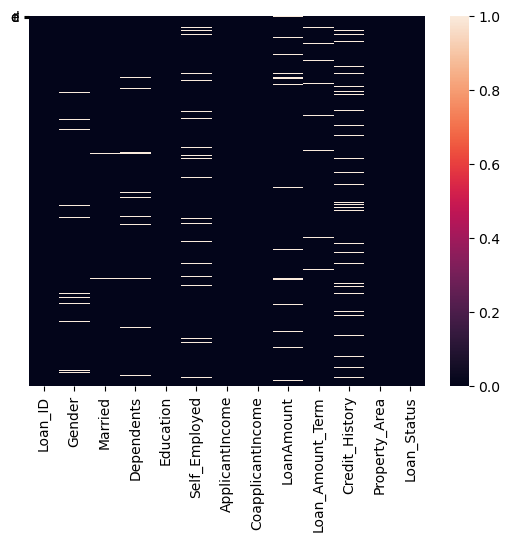

In [1127]:
sns.heatmap(df.isnull(),yticklabels='red')
plt.show()

In [1128]:
# Treatment of null value fill with mean , medium and mode

In [1129]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1130]:
df1=df.copy()

In [1131]:
df1['Gender']=df1['Gender'].fillna(df1['Gender'].mode())
df1['Married']=df1['Married'].fillna(df1['Married'].mode())
df1['Dependents']=df1['Dependents'].fillna(df1['Dependents'].mode())
df1['Self_Employed']=df1['Self_Employed'].fillna(df1['Self_Employed'].mode())
df1['LoanAmount']=df1['LoanAmount'].fillna(df1['LoanAmount'].mean())
df1['Loan_Amount_Term']=df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean())
df1['Credit_History']=df1['Credit_History'].fillna(df1['Credit_History'].mean())

In [1132]:
# we fill null value with mean and mode

#  Checking Uniqe Value 

In [1133]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [1134]:
column=df1.columns
column

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1135]:
for column in column:
    print(f'{column}:{df1[column].unique()}')

Loan_ID:['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289

In [1136]:
# Gender , Married , Dependants and Self_employed contain unique Value 

In [1137]:
df1['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [1138]:
df1['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [1139]:
df1['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [1140]:
df1['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

# Drop all Unique value 

In [1141]:
df1=df1.dropna(how='any',axis=0) 

In [1142]:
df1.drop(['Loan_ID'],axis=1,inplace=True)

In [1143]:
df1.isnull().sum()*100/len(df1) # No null value 

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [1144]:
df1.shape

(554, 12)

# EDA 

In [1145]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [1146]:
a=list(df1.select_dtypes(include=object).columns)
a

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [1147]:
df1.shape

(554, 12)

IndexError: list index out of range

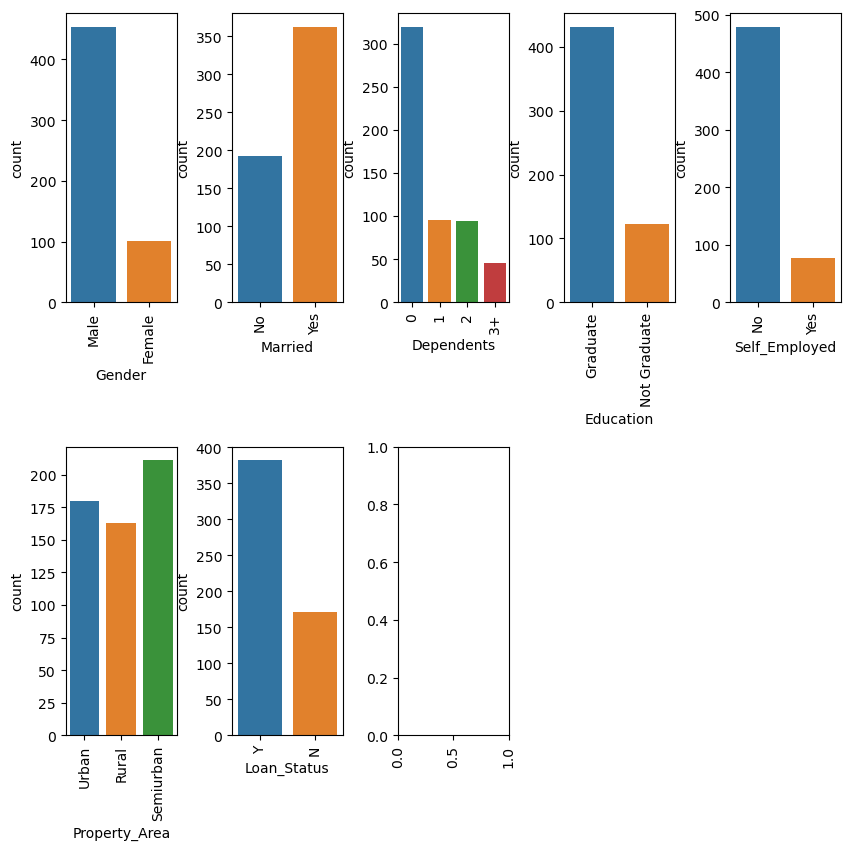

In [1148]:
plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=0.5,wspace=.5)
for i in range(len(df1)):
    plt.subplot(3,5,i+1)
    plt.xticks(rotation=90)
    sns.countplot(df1[a[i]])

In [1149]:
# Gender = In this chart you can see Male high apply for loan 
# Married = in married most of applicant are married 
# Education = in education most of applicant are garduated
# Self_employed = in this columns are most of appliant are not self emploed
# Loan Status = most of yes in loan status 

In [1150]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Gender', ylabel='count'>

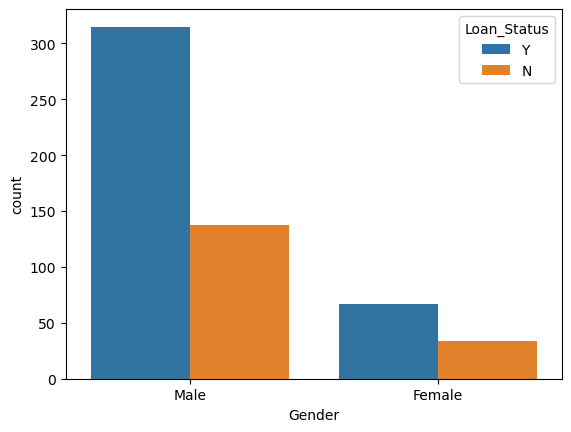

In [1151]:
sns.countplot(data=df1,x='Gender',hue='Loan_Status')

<AxesSubplot:xlabel='Education', ylabel='count'>

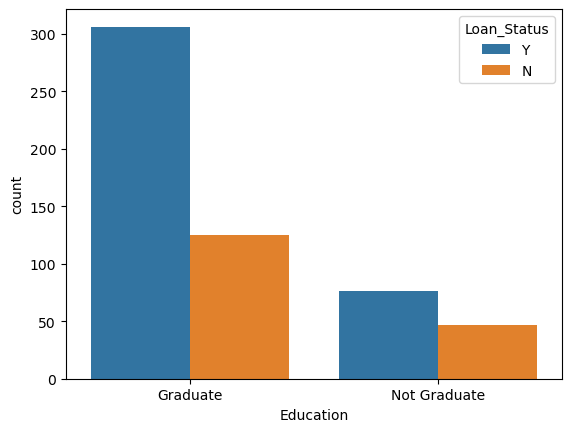

In [1152]:
sns.countplot(data=df1,x='Education',hue='Loan_Status')

<AxesSubplot:xlabel='Married', ylabel='count'>

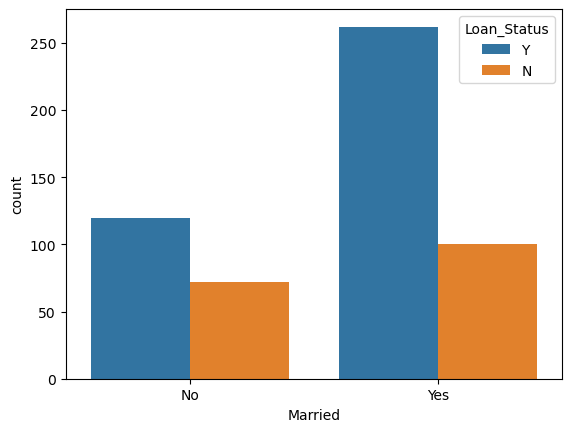

In [1153]:
sns.countplot(data=df1,x='Married',hue='Loan_Status')

In [1154]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

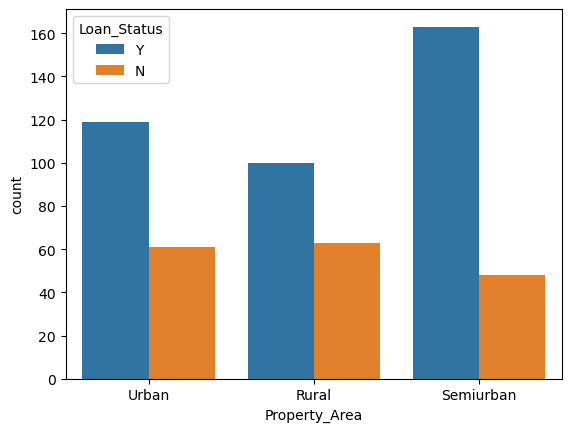

In [1155]:
sns.countplot(data=df1,x='Property_Area',hue='Loan_Status')

In [1156]:
# Large number of peaople are semiuraban they apply for loan and approval 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

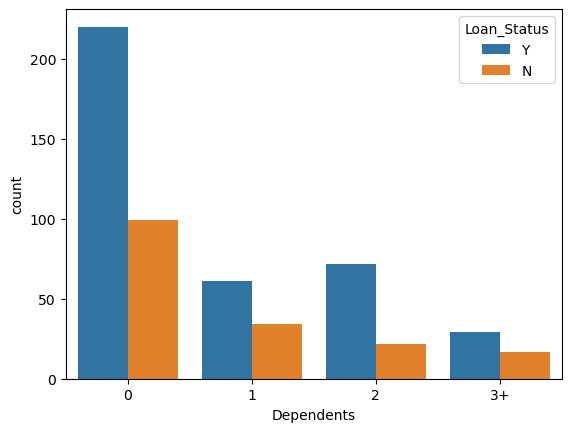

In [1157]:
sns.countplot(data=df1,x='Dependents',hue='Loan_Status')

In [1158]:
# Large number of applicant are not dependents 

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

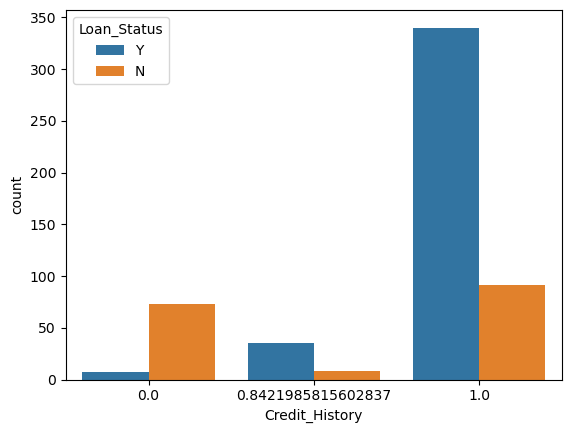

In [1159]:
sns.countplot(data=df1,x='Credit_History',hue='Loan_Status')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

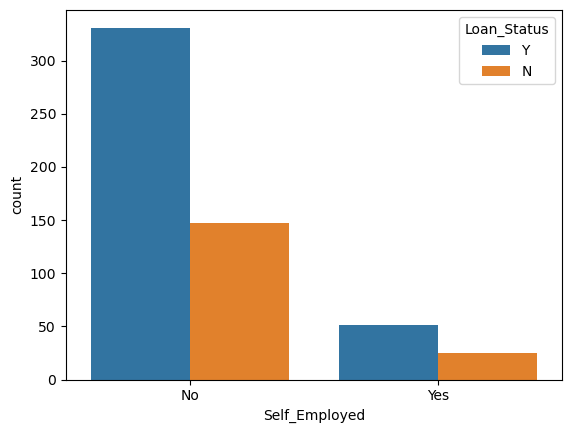

In [1160]:
sns.countplot(data=df1,x='Self_Employed',hue='Loan_Status')

In [1161]:
# Large number of applicant are not self employed

In [1162]:
# Checking your data are normali distribut or not 

In [1163]:
from scipy.stats import norm

In [1164]:
df1.skew()

ApplicantIncome      6.881481
CoapplicantIncome    5.736590
LoanAmount           2.578663
Loan_Amount_Term    -2.463236
Credit_History      -1.972706
dtype: float64

In [1165]:
df1.kurt()

ApplicantIncome      75.510981
CoapplicantIncome    57.769849
LoanAmount           10.013369
Loan_Amount_Term      7.219466
Credit_History        1.984423
dtype: float64

In [1166]:
# Our data are not normal distribution 

In [1167]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [1168]:
df1.shape

(554, 12)

In [1169]:
# Doing Label encoding 

In [1170]:
df1['Gender'].value_counts()

Male      453
Female    101
Name: Gender, dtype: int64

In [1171]:
df1['Gender']=df1['Gender'].replace({'Male':1,'Female':0})

In [1172]:
df1['Married'].value_counts()

Yes    362
No     192
Name: Married, dtype: int64

In [1173]:
df1['Married']=df1['Married'].replace({'Yes':1,'No':0})

In [1174]:
df1['Education'].value_counts()

Graduate        431
Not Graduate    123
Name: Education, dtype: int64

In [1175]:
df1['Education']=df1['Education'].replace({'Graduate':1,'Not Graduate':0})

In [1176]:
df1['Self_Employed'].value_counts()

No     478
Yes     76
Name: Self_Employed, dtype: int64

In [1177]:
df1['Self_Employed']=df1['Self_Employed'].replace({'Yes':1,'No':0})

In [1178]:
df1['Property_Area'].value_counts()

Semiurban    211
Urban        180
Rural        163
Name: Property_Area, dtype: int64

In [1179]:
df1['Property_Area']=df1['Property_Area'].replace({'Semiurban':0,'Urban':1,'Rural':2})

In [1180]:
df1['Dependents'].value_counts()

0     319
1      95
2      94
3+     46
Name: Dependents, dtype: int64

In [1181]:
df1['Dependents']=df1['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3})

In [1241]:
df1['Loan_Status']=df1['Loan_Status'].replace({'Y':0,'N':1})

In [1242]:
df1['Loan_Status'].value_counts()

1    382
0    172
Name: Loan_Status, dtype: int64

In [1184]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             554 non-null    int64  
 1   Married            554 non-null    int64  
 2   Dependents         554 non-null    int64  
 3   Education          554 non-null    int64  
 4   Self_Employed      554 non-null    int64  
 5   ApplicantIncome    554 non-null    int64  
 6   CoapplicantIncome  554 non-null    float64
 7   LoanAmount         554 non-null    float64
 8   Loan_Amount_Term   554 non-null    float64
 9   Credit_History     554 non-null    float64
 10  Property_Area      554 non-null    int64  
 11  Loan_Status        554 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 56.3 KB


In [1185]:
corr=df1.corr() #Pearsons Method

<AxesSubplot:>

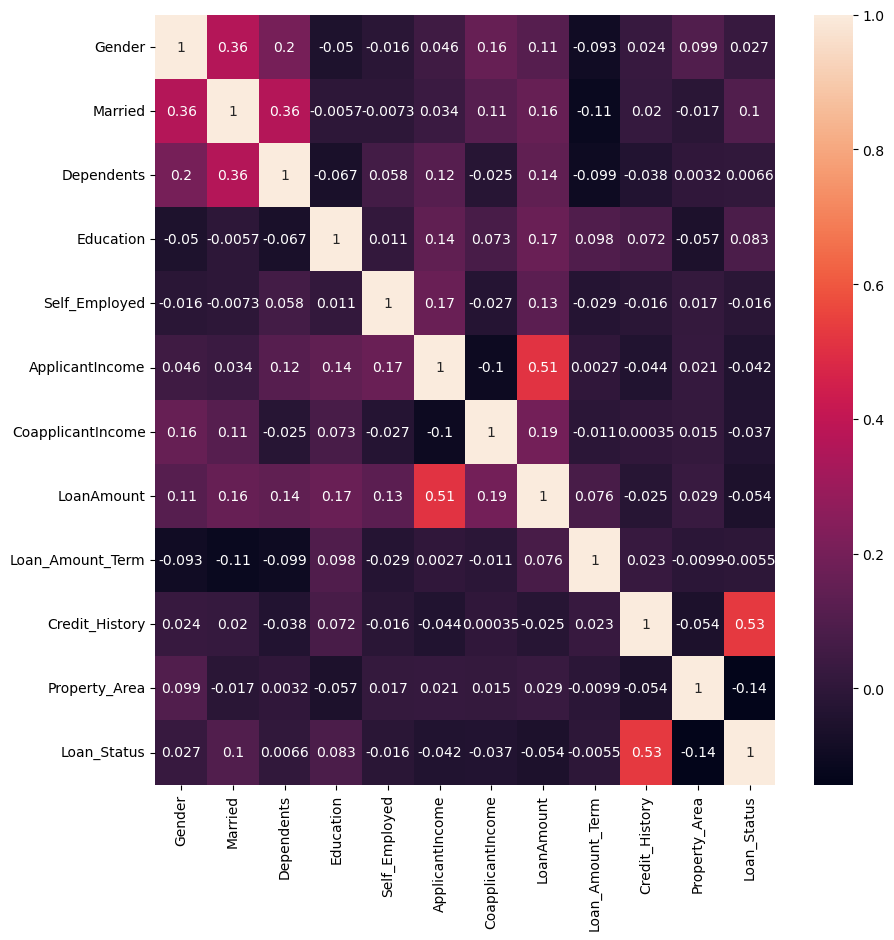

In [1186]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [1187]:
df1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,0.817690,0.653430,0.759928,0.777978,0.137184,5267.059567,1585.575668,144.969009,341.956679,0.843348,0.913357,0.689531
std,0.386449,0.476308,1.010855,0.415981,0.344353,5455.163295,2524.484889,81.078416,64.727653,0.349310,0.817796,0.463104
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2843.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3839.500000,1149.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5818.750000,2297.250000,166.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,650.000000,480.000000,1.000000,2.000000,1.000000


# Outliers 

<AxesSubplot:>

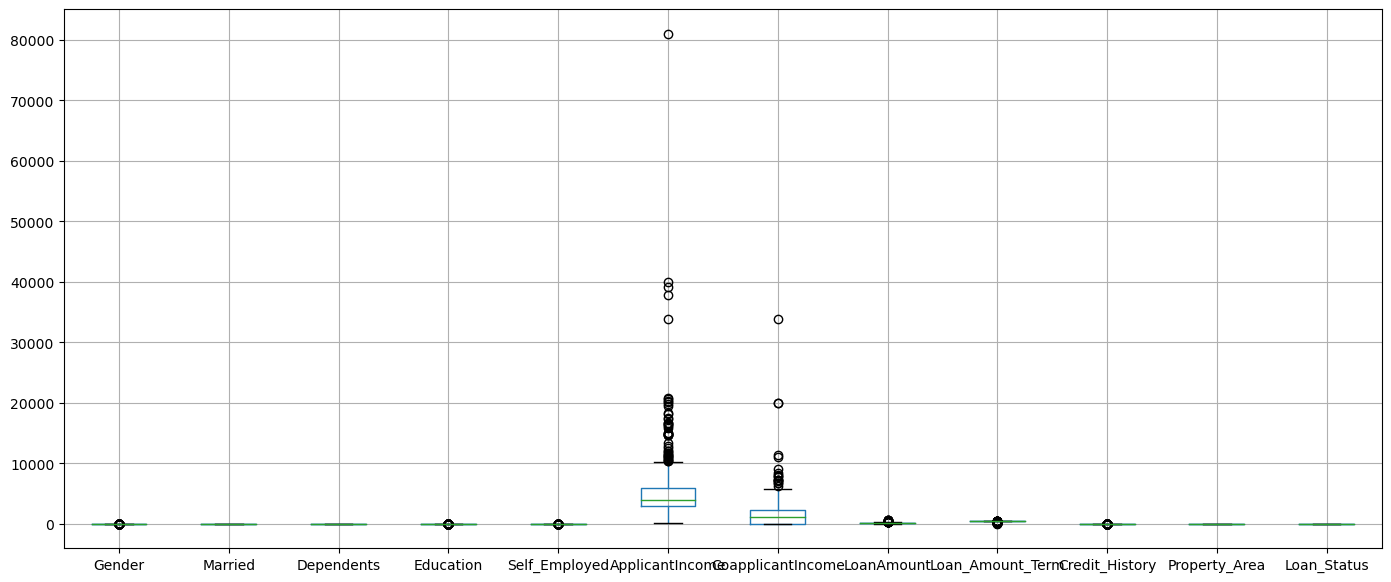

In [1188]:
plt.figure(figsize = (17, 7))
df1.boxplot()

In [1189]:
# in Applicant and co applicant and laon amount conatain outliers 

In [1190]:
df1.shape

(554, 12)

In [1191]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


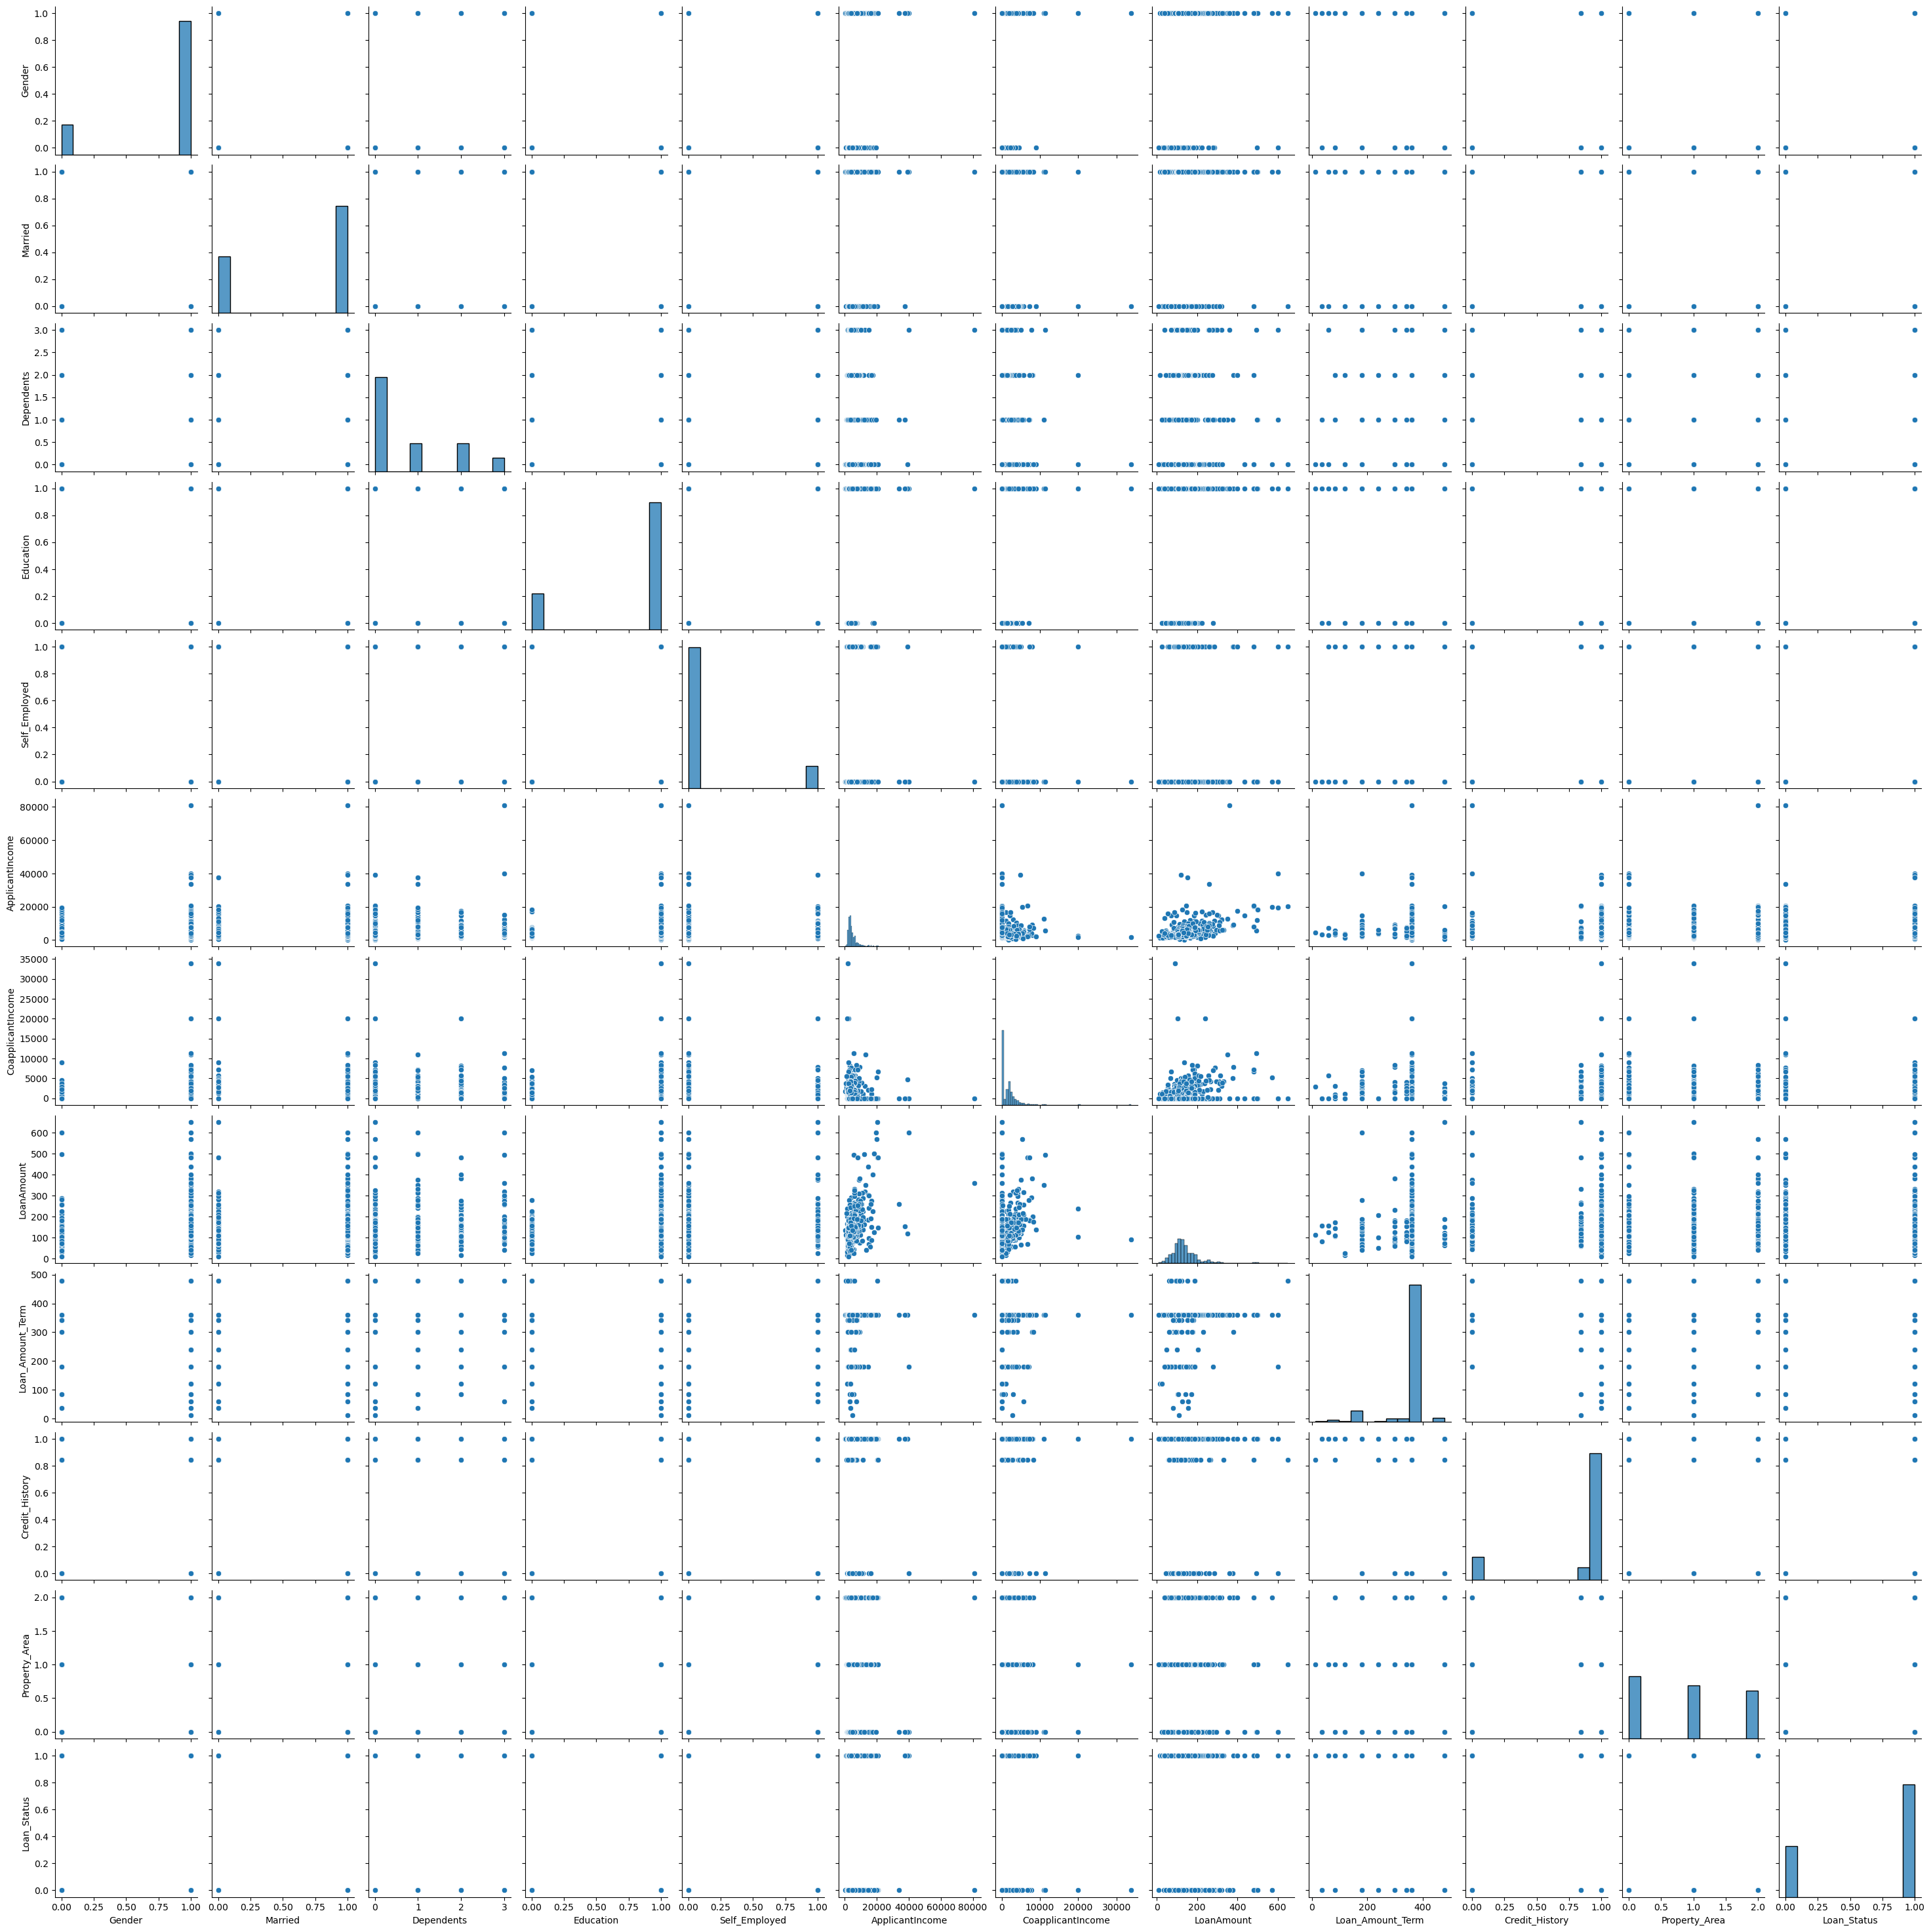

In [1192]:
sns.pairplot(df1)

In [1193]:
# Our data are not noramlly distribution 

# Model Building Process 

In [1194]:
x=df1.drop(['Loan_Status'],axis=1)
y=df1['Loan_Status']

In [1195]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1


In [1196]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [1197]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [1198]:
scaler=StandardScaler()

In [1199]:
X_scaled=scaler.fit_transform(x)

In [1200]:
X_scaled

array([[ 0.47218435, -1.37310475, -0.75244704, ...,  0.27900947,
         0.44886807,  0.1060422 ],
       [ 0.47218435,  0.72827655,  0.23770892, ...,  0.27900947,
         0.44886807,  1.32994595],
       [ 0.47218435,  0.72827655, -0.75244704, ...,  0.27900947,
         0.44886807,  0.1060422 ],
       ...,
       [ 0.47218435,  0.72827655,  0.23770892, ...,  0.27900947,
         0.44886807,  0.1060422 ],
       [ 0.47218435,  0.72827655,  1.22786488, ...,  0.27900947,
         0.44886807,  0.1060422 ],
       [-2.11781692, -1.37310475, -0.75244704, ...,  0.27900947,
        -2.41650718, -1.11786154]])

In [1201]:
from sklearn.model_selection import train_test_split

In [1202]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,y,random_state=100,train_size=0.80,stratify=y)

In [1203]:
X_train

array([[ 4.72184347e-01,  7.28276555e-01,  1.22786488e+00, ...,
         2.79009469e-01,  4.48868073e-01,  1.32994595e+00],
       [ 4.72184347e-01,  7.28276555e-01,  2.37708921e-01, ...,
         6.69890682e-04, -2.41650718e+00,  1.06042202e-01],
       [ 4.72184347e-01,  7.28276555e-01,  1.22786488e+00, ...,
         2.79009469e-01,  4.48868073e-01,  1.06042202e-01],
       ...,
       [ 4.72184347e-01,  7.28276555e-01,  1.22786488e+00, ...,
         2.79009469e-01,  4.48868073e-01,  1.32994595e+00],
       [ 4.72184347e-01, -1.37310475e+00,  2.37708921e-01, ...,
         2.79009469e-01,  4.48868073e-01, -1.11786154e+00],
       [ 4.72184347e-01,  7.28276555e-01, -7.52447035e-01, ...,
         2.79009469e-01, -2.41650718e+00,  1.32994595e+00]])

In [1204]:
X_test

array([[ 0.47218435,  0.72827655,  0.23770892, ...,  0.27900947,
         0.44886807,  1.32994595],
       [ 0.47218435,  0.72827655,  2.21802083, ..., -4.3599835 ,
         0.44886807,  0.1060422 ],
       [ 0.47218435,  0.72827655, -0.75244704, ...,  0.27900947,
         0.44886807, -1.11786154],
       ...,
       [ 0.47218435,  0.72827655,  1.22786488, ...,  0.27900947,
         0.44886807, -1.11786154],
       [ 0.47218435,  0.72827655, -0.75244704, ...,  0.27900947,
         0.44886807, -1.11786154],
       [ 0.47218435,  0.72827655,  0.23770892, ...,  0.27900947,
         0.44886807,  0.1060422 ]])

In [1205]:
# Import Matrix

In [1206]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

In [1207]:
# Import model Logistic Regression 

In [1208]:
from sklearn.linear_model import LogisticRegression

In [1246]:
lr=LogisticRegression(class_weight='balanced')
lr

LogisticRegression(class_weight='balanced')

In [1247]:
abc=lr.fit(X_train,Y_train)
y_pred_test=abc.predict(X_test)
y_pred_train=abc.predict(X_train)

In [1250]:
Astrain=accuracy_score(Y_train,y_pred_train)
Astrain

0.7562076749435666

In [1251]:
Astest=accuracy_score(Y_test,y_pred_test)
Astest

0.7027027027027027

In [1252]:
print(confusion_matrix(Y_train,y_pred_train))
print(classification_report(Y_test,y_pred_test))
print('******************************************************************')
print(classification_report(Y_train,y_pred_train))
print(confusion_matrix(Y_test,y_pred_test))

[[ 78  60]
 [ 48 257]]
              precision    recall  f1-score   support

           0       0.52      0.47      0.49        34
           1       0.78      0.81      0.79        77

    accuracy                           0.70       111
   macro avg       0.65      0.64      0.64       111
weighted avg       0.70      0.70      0.70       111

******************************************************************
              precision    recall  f1-score   support

           0       0.62      0.57      0.59       138
           1       0.81      0.84      0.83       305

    accuracy                           0.76       443
   macro avg       0.71      0.70      0.71       443
weighted avg       0.75      0.76      0.75       443

[[16 18]
 [15 62]]


In [1214]:
# KNN Method 

In [1215]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn

KNeighborsClassifier()

In [1254]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

In [1256]:
knn=KNeighborsClassifier(leaf_size=1, metric='minkowski', n_neighbors=10, p=2)
sv=SVC(C=0.2,kernel='rbf',gamma=0.01)
gnb=GaussianNB()
dt=DecisionTreeClassifier(criterion='gini',max_depth= 2,max_leaf_nodes= 2,min_samples_split=10)
rfc=RandomForestClassifier()
bc=BaggingClassifier()

In [1257]:
for model in [knn,sv,gnb,dt,rfc,bc]:
    print('************************************************************************',model)
    fit=model.fit(X_train,Y_train)
    Y_pred_train=fit.predict(X_train)
    Y_pred_test=fit.predict(X_test)
    As_train=accuracy_score(Y_pred_train,Y_train)
    As_test=accuracy_score(Y_pred_test,Y_test)
    cm=confusion_matrix(Y_pred_test,Y_test)
    cr=classification_report(Y_pred_test,Y_test)
    
    
    
    
    
    print("training Accuracy score \n" ,As_train)
    print("=========="*3)
    print("testing Accuracy score \n" ,As_test)
    print("=========="*3)
    print("Confusion matrix \n" ,cm)
    print("=========="*3)
    print("CLASSIFICATION REPORT \n" ,cr)
    print("=========="*3)
    #print("ROC AUC \n" ,ROC)
    print("=========="*3)

************************************************************************ KNeighborsClassifier(leaf_size=1, n_neighbors=10)
training Accuracy score 
 0.8261851015801355
testing Accuracy score 
 0.7927927927927928
Confusion matrix 
 [[13  2]
 [21 75]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.38      0.87      0.53        15
           1       0.97      0.78      0.87        96

    accuracy                           0.79       111
   macro avg       0.68      0.82      0.70       111
weighted avg       0.89      0.79      0.82       111

************************************************************************ SVC(C=0.2, gamma=0.01)
training Accuracy score 
 0.8148984198645598
testing Accuracy score 
 0.7837837837837838
Confusion matrix 
 [[12  2]
 [22 75]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.35      0.86      0.50        14
           1       0.97      0.77      0.86

# know we check parameter throgh gridsearch cv

In [1219]:
from sklearn.model_selection import GridSearchCV

In [1220]:
# SVC

In [1221]:
tuned_param={'C':[0.01,0.05,0.1,0.2,0.3,0.5,0.7,1],'gamma':[0.01,0.1,0.05,0.5,1,5,10,20],
            'kernel':['rbf','linear','poly']}
svc=SVC()
grid=GridSearchCV(svc,tuned_param,cv=10)
grid.fit(X_train,Y_train)
grid.best_params_

{'C': 0.2, 'gamma': 0.01, 'kernel': 'rbf'}

In [1222]:
#KNN

In [1223]:
tuned_param_knn={'n_neighbors':[5,6,7,8,9,10,12,3,4,1,2],'leaf_size':[1,2,3,4,5,6,7,8,9,10,11],'p':[1,2],'metric':['minkowski']}
knn1=KNeighborsClassifier()
grid=GridSearchCV(knn1,tuned_param_knn,cv=10)
grid.fit(X_train,Y_train)
grid.best_params_

{'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2}

In [1224]:
# DecisionTreeClassifier

In [1225]:
param_grid={'max_depth':[2,30],'criterion':['gini','entropy'],
           'max_leaf_nodes':[2,20],'min_samples_split':[10,40]}
dt1=DecisionTreeClassifier()
grid=GridSearchCV(dt1,param_grid,cv=10)
grid.fit(X_train,Y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 2,
 'min_samples_split': 10}